## Load Dataset 

In [2]:
import pandas as pd 

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

## Dataset Info 

Number of duplicate rows:  52
Number of Nan Rows:  0
Number of rows:  252123
Number of columns:  91


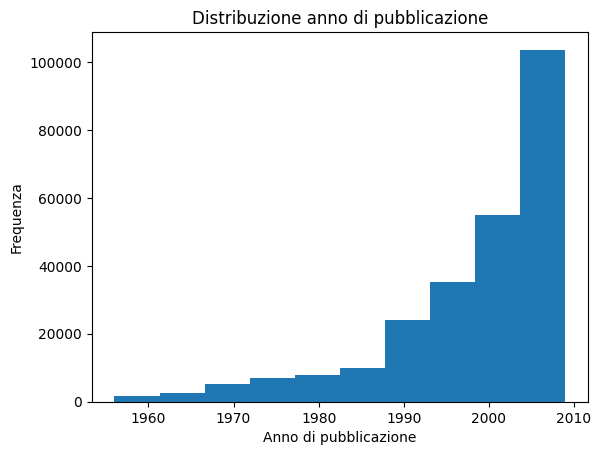

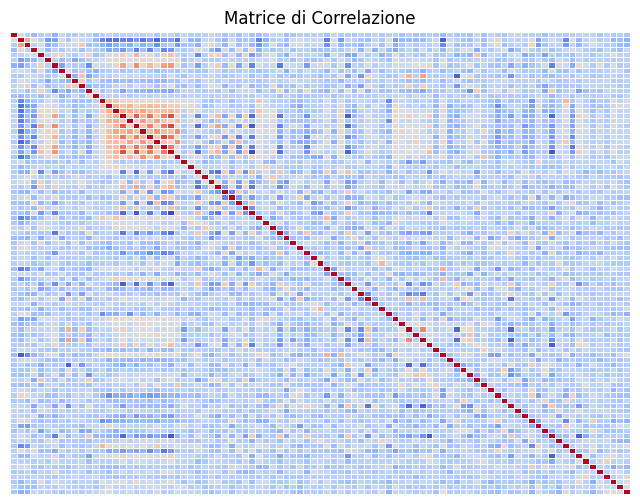

,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
Year,1.000000,0.213149,-0.001832,-0.129074,-0.003938,0.019515,-0.169174,0.095213,-0.024117,-0.027370,...,-0.030814,-0.002243,0.024368,0.037740,0.054777,-0.055590,0.025376,-0.043381,0.009868,-0.053436
S0,0.213149,1.000000,0.558754,0.248705,0.023991,-0.284982,-0.260284,0.164988,-0.057143,0.221058,...,-0.360040,0.189109,-0.136963,0.032369,0.127525,-0.024526,0.047169,-0.145372,-0.105619,-0.182971
S1,-0.001832,0.558754,1.000000,0.022646,0.132121,-0.188175,-0.101618,0.112387,0.110166,0.126423,...,-0.288081,0.051866,-0.149088,0.024786,0.147371,0.046378,-0.002788,-0.013805,-0.122098,-0.159251
S2,-0.129074,0.248705,0.022646,1.000000,0.155434,-0.132145,0.036405,-0.054220,0.081319,0.042315,...,0.068947,0.171300,0.104075,-0.006991,-0.030990,-0.090743,0.080627,-0.062984,-0.099614,0.096715
S3,-0.003938,0.023991,0.132121,0.155434,1.000000,0.034437,0.324256,0.284863,0.033020,-0.038691,...,-0.020893,-0.094068,0.045185,0.060398,-0.068541,0.043292,0.034660,0.249938,0.033186,0.011233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S85,-0.055590,-0.024526,0.046378,-0.090743,0.043292,0.006048,0.210750,-0.015940,-0.030155,0.013455,...,-0.025067,-0.133581,0.081055,0.089901,0.052687,1.000000,0.010796,0.155261,0.152704,-0.013106
S86,0.025376,0.047169,-0.002788,0.080627,0.034660,-0.005347,-0.034651,0.013615,0.013508,0.062083,...,0.047284,-0.017604,0.148040,0.333495,0.005406,0.010796,1.000000,0.011742,0.100337,0.250297
S87,-0.043381,-0.145372,-0.013805,-0.062984,0.249938,-0.017195,0.148556,0.068472,0.049102,-0.012222,...,0.076391,0.024953,0.276060,0.007675,-0.211285,0.155261,0.011742,1.000000,0.066177,0.222273
S88,0.009868,-0.105619,-0.122098,-0.099614,0.033186,0.007829,-0.020012,0.078573,0.000726,-0.006798,...,0.101466,-0.047575,0.045605,0.052842,-0.035555,0.152704,0.100337,0.066177,1.000000,0.193516


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

duplicates = df.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

df = df.drop_duplicates()

total_nan_rows = df.isna().any(axis=1).sum()


print("Number of Nan Rows: ", total_nan_rows)


num_rows, num_cols = df.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

plt.hist(df['Year'])
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()

matrix_corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix_corr, annot=False, cmap='coolwarm', fmt=".2f",linewidths=.5, xticklabels=False, yticklabels=False, cbar=False)
plt.title('Matrice di Correlazione')
plt.show()

matrix_corr


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(X)
plt.title('Box Plot delle Features')
plt.show()


NameError: name 'X' is not defined

<Figure size 1500x1000 with 0 Axes>

## PreProcess


In [5]:
from sklearn import preprocessing

# a function with different normalization and scaling techniques
def preprocess(X_train, X_test, modality):
    
    X_train_p = X_train
    X_test_p = X_test
        
    if modality == 'l2' or modality == 'l1':
        X_train_p = preprocessing.normalize(X_train, norm=modality)
        X_test_p = preprocessing.normalize(X_test, norm=modality)

    if modality == 'standard':
        scaler = preprocessing.StandardScaler()
        scaler.fit(X_train)
        X_train_p = scaler.transform(X_train)
        X_test_p = scaler.transform(X_test)

    if modality == 'min-max':
        scaler = preprocessing.MinMaxScaler()
        scaler.fit(X_train)
        X_train_p = scaler.transform(X_train)
        X_test_p = scaler.transform(X_test)

    return X_train_p, X_test_p

## Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import itertools
from scipy import stats

X = df.drop("Year", axis=1)
y = df["Year"]

seed = 42


# Esegui lo split in set di addestramento, di test e di validazione
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


median_values = np.nanmedian(X_train, axis=0)

# Calcola i valori z-score solo su X_train
z_scores_features = stats.zscore(X_train, axis=0)

# Imposta la soglia per i valori z-score per le features
threshold_features = 3

# Sostituisci gli outlier nelle features con la mediana delle rispettive colonne solo in X_train
X_train = np.where(np.abs(z_scores_features) > threshold_features, median_values, X_train)

# Usa la stessa trasformazione sugli z-score di X_test
X_test = np.where(np.abs(stats.zscore(X_test, axis=0)) > threshold_features, median_values,  X_test)


pre = ['No', 'standard', 'min-max']
hyperparameters = itertools.product(pre)

def score(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

best_r2 = -np.inf
best_preprocessing = 'No'

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

for preprocessing_type in pre:  # Rinomina la variabile per evitare conflitti
    # Preprocess
    X_train_p, X_val_p = preprocess(X_train, X_val, preprocessing_type)
    
    # Initialize Linear Regression model
    model = LinearRegression()
    
    # Cross-validate
    scores = cross_val_score(model, X_train_p, y_train, cv=cv, scoring=score)
    
    # Save best result so far
    avg_r2 = np.mean(scores)
    print("Cross-validation R-squared: {:.3f}".format(avg_r2), "Preprocessing =", preprocessing_type)
    
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_preprocessing = preprocessing_type

print("\nBest Preprocessing:", best_preprocessing)

# Final training and testing
X_train_p, X_test_p = preprocess(X_train, X_test, best_preprocessing)
model = LinearRegression()
model.fit(X_train_p, y_train)

y_test_pred = model.predict(X_test_p)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = np.mean(np.abs(y_test - y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("\nTest set MSE: {:.2f}".format(mse_test))
print("Test set R-squared: {:.2f}".format(r2_test))
print("Test set MAE: {:.2f}".format(mae_test))
print("Test set MAPE: {:.2f}%".format(mape_test))

Cross-validation R-squared: 0.220 Preprocessing = No fit_intercept = True
Cross-validation R-squared: -165.939 Preprocessing = No fit_intercept = False


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.220 Preprocessing = standard fit_intercept = True


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: -36285.444 Preprocessing = standard fit_intercept = False


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.220 Preprocessing = min-max fit_intercept = True


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: -24.190 Preprocessing = min-max fit_intercept = False

Best Preprocessing: No
Best fit_intercept: True

Test set MSE: 84.76
Test set R-squared: 0.22
Test set MAE: 6.69
Test set MAPE: 0.34%


## Random Forest 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing as sk_preprocessing
import numpy as np
import itertools

# Caricamento dei dati
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

seed = 42

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Hyperparameters
pre = ['No', 'standard', 'min-max']
hyperparameters = itertools.product(pre)

def score(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

best_r2 = -np.inf
best_preprocessing = 'No'

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

for preprocessing_type in pre:
    # Preprocess
    X_train_p, X_val_p = preprocess(X_train, X_val, preprocessing_type)
    
    # Initialize Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=seed)  # Modifica il numero di stimatori se necessario
    
    # Cross-validate
    scores = cross_val_score(model, X_train_p, y_train, cv=cv, scoring=score)
    
    # Save best result so far
    avg_r2 = np.mean(scores)
    print("Cross-validation R-squared: {:.3f}".format(avg_r2), "Preprocessing =", preprocessing_type)
    
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_preprocessing = preprocessing_type

print("\nBest Preprocessing:", best_preprocessing)

# Final training and testing
X_train_p, X_test_p = preprocess(X_train, X_test, best_preprocessing)
model = RandomForestRegressor(n_estimators=100, random_state=seed)  # Modifica il numero di stimatori se necessario
model.fit(X_train_p, y_train)


y_test_pred = model.predict(X_test_p)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = np.mean(np.abs(y_test - y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("\nTest set MSE: {:.2f}".format(mse_test))
print("Test set R-squared: {:.2f}".format(r2_test))
print("Test set MAE: {:.2f}".format(mae_test))
print("Test set MAPE: {:.2f}%".format(mape_test))


KeyboardInterrupt: 

## SVR


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import itertools

# Caricamento dei dati
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

seed = 42

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


median_values = np.nanmedian(X_train, axis=0)

# Calcola i valori z-score solo su X_train
z_scores_features = stats.zscore(X_train, axis=0)

# Imposta la soglia per i valori z-score per le features
threshold_features = 3

# Sostituisci gli outlier nelle features con la mediana delle rispettive colonne solo in X_train
X_train = np.where(np.abs(z_scores_features) > threshold_features, median_values, X_train)

# Usa la stessa trasformazione sugli z-score di X_test
X_test = np.where(np.abs(stats.zscore(X_test, axis=0)) > threshold_features, median_values,  X_test)


# Hyperparameters
pre = ['No', 'standard', 'min-max']
Cs = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf']
hyperparameters = itertools.product(kernels, pre, Cs)

def score(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

best_r2 = -np.inf
best_C = 0
best_preprocessing = 'No'
best_kernel = 'linear'

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

for kernel, preprocessing, C in hyperparameters:
    # Preprocess
    X_train_p, X_val_p = preprocess(X_train, X_val, preprocessing)
    
    # Initialize SVR model
    model = SVR(kernel=kernel, C=C)
    
    # Cross-validate
    scores = cross_val_score(model, X_train_p, y_train, cv=cv, scoring=score)
    
    # Save best result so far
    avg_r2 = np.mean(scores)
    print("Cross-validation R-squared: {:.3f}".format(avg_r2), "Kernel =", kernel, "Preprocessing =", preprocessing, "C =", C)
    
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_C = C
        best_preprocessing = preprocessing
        best_kernel = kernel

print("\nBest C value:", best_C)
print("Best Preprocessing:", best_preprocessing)
print("Best Kernel:", best_kernel)

# Final training and testing
X_train_p, X_test_p = preprocess(X_train, X_test, best_preprocessing)
model = SVR(kernel=best_kernel, C=best_C)
model.fit(X_train_p, y_train)

y_test_pred = model.predict(X_test_p)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = np.mean(np.abs(y_test - y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("\nTest set MSE: {:.2f}".format(mse_test))
print("Test set R-squared: {:.2f}".format(r2_test))
print("Test set MAE: {:.2f}".format(mae_test))
print("Test set MAPE: {:.2f}%".format(mape_test))


## KNN Regressor 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing as sk_preprocessing
import numpy as np
import itertools
from scipy import stats
from sklearn.model_selection import GridSearchCV

# Caricamento dei dati
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

seed = 42

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

median_values = np.nanmedian(X_train, axis=0)

# Calcola i valori z-score solo su X_train
z_scores_features = stats.zscore(X_train, axis=0)

# Imposta la soglia per i valori z-score per le features
threshold_features = 3

# Sostituisci gli outlier nelle features con la mediana delle rispettive colonne solo in X_train
X_train = np.where(np.abs(z_scores_features) > threshold_features, median_values, X_train)

# Usa la stessa trasformazione sugli z-score di X_test
X_test = np.where(np.abs(stats.zscore(X_test, axis=0)) > threshold_features, median_values,  X_test)

pre = ['No', 'standard', 'min-max']
n_neighbors_values = [5, 7, 9, 11]  # Modifica i valori secondo le tue esigenze
hyperparameters = list(itertools.product(pre, n_neighbors_values))

def score(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

best_r2 = -np.inf
best_preprocessing = 'No'
best_n_neighbors = 0

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

for preprocessing_type, n_neighbors in hyperparameters:
    # Preprocess
    X_train_p, X_val_p = preprocess(X_train, X_val, preprocessing_type)
    
    # Initialize KNN Regressor model
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Cross-validate
    scores = cross_val_score(model, X_train_p, y_train, cv=cv, scoring=score)
    
    # Save best result so far
    avg_r2 = np.mean(scores)
    print("Cross-validation R-squared: {:.3f}".format(avg_r2), "Preprocessing =", preprocessing_type, "n_neighbors =", n_neighbors)
    
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_preprocessing = preprocessing_type
        best_n_neighbors = n_neighbors

print("\nBest Preprocessing:", best_preprocessing)
print("Best n_neighbors:", best_n_neighbors)

X_train_p, X_test_p = preprocess(X_train, X_test, best_preprocessing)
model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
model.fit(X_train_p, y_train)

y_test_pred = model.predict(X_test_p)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = np.mean(np.abs(y_test - y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("\nTest set MSE: {:.2f}".format(mse_test))
print("Test set R-squared: {:.2f}".format(r2_test))
print("Test set MAE: {:.2f}".format(mae_test))
print("Test set MAPE: {:.2f}%".format(mape_test))

Cross-validation R-squared: -0.021 Preprocessing = No n_neighbors = 5
Cross-validation R-squared: 0.023 Preprocessing = No n_neighbors = 7
Cross-validation R-squared: 0.047 Preprocessing = No n_neighbors = 9
Cross-validation R-squared: 0.060 Preprocessing = No n_neighbors = 11
Cross-validation R-squared: 0.069 Preprocessing = No n_neighbors = 13


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.132 Preprocessing = standard n_neighbors = 5


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.164 Preprocessing = standard n_neighbors = 7


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.182 Preprocessing = standard n_neighbors = 9


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.193 Preprocessing = standard n_neighbors = 11


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.198 Preprocessing = standard n_neighbors = 13


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.145 Preprocessing = min-max n_neighbors = 5


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.178 Preprocessing = min-max n_neighbors = 7


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.194 Preprocessing = min-max n_neighbors = 9


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.203 Preprocessing = min-max n_neighbors = 11


/Users/acco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Cross-validation R-squared: 0.209 Preprocessing = min-max n_neighbors = 13

Best Preprocessing: min-max
Best n_neighbors: 13

Test set MSE: 86.21
Test set R-squared: 0.21
Test set MAE: 6.87
Test set MAPE: 0.34%
